In [5]:
# read in respiratory illness data set 
resp <- read.csv("../../data/resp/resp.csv", header = TRUE)

In [ ]:
# compute sample mean and covariance matrix of the two variables of interest 
# (airflow at 50% and 75% of completing exhalation, log-transformed to obtain a closer-to-Normal distribution)
xbar <- colMeans(cbind(log(resp$fef50), log(resp$fef75)))
S <- cov(cbind(log(resp$fef50), log(resp$fef75)))

In [15]:
cov2cor(S)

1.0000000,0.8838845
0.8838845,1.0000000


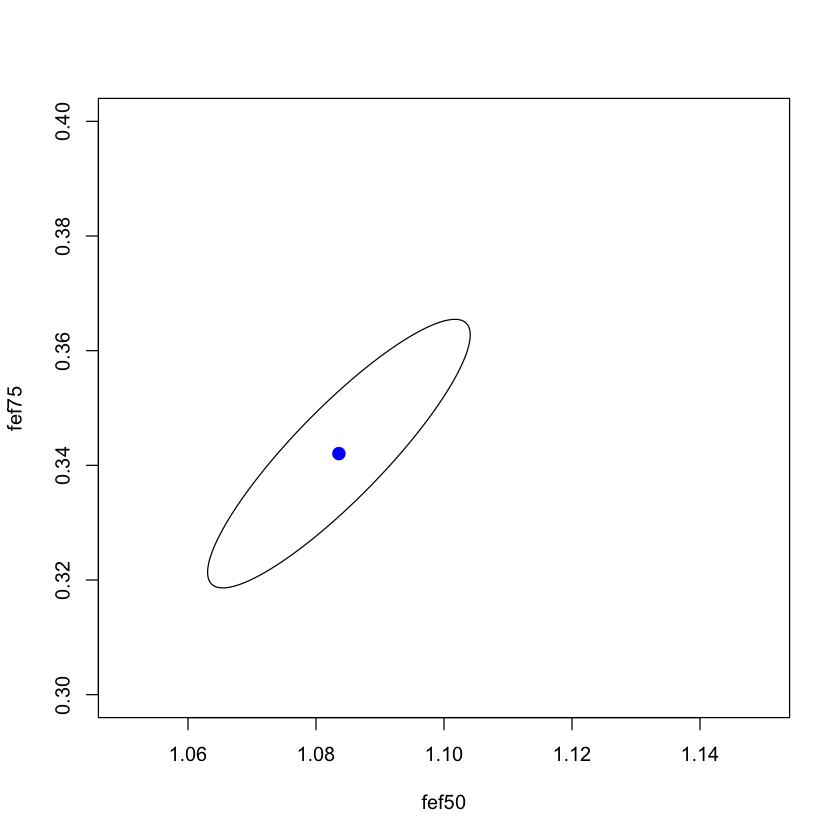

In [ ]:
# compute matrix root
eigS <- eigen(S)
Shalf <- eigS$vectors %*% diag(sqrt(eigS$values))

# set n and d
d <- 2
n <- nrow(resp)

# radius of confidence ellipsoid according to Hotellings' T^2 distribution (more specifically, the equivalent F-distribution)
radius <- sqrt(((n-1)/n) * d / (n-d) * qf(0.95, df1 = d, df2 = n - d))

gr <- seq(from = 0, to = 2*pi, length = 200)

#
xy <- (cbind(cos(gr), sin(gr)) %*% t(Shalf)) * radius
plot(xy[,1] + xbar[1], xy[,2] + xbar[2], type = "l", xlim = c(1.05, 1.15), ylim = c(0.3, 0.4), xlab = "fef50", ylab = "fef75")
points(xbar[1], xbar[2], col = "blue", cex = 1.5, pch = 16)

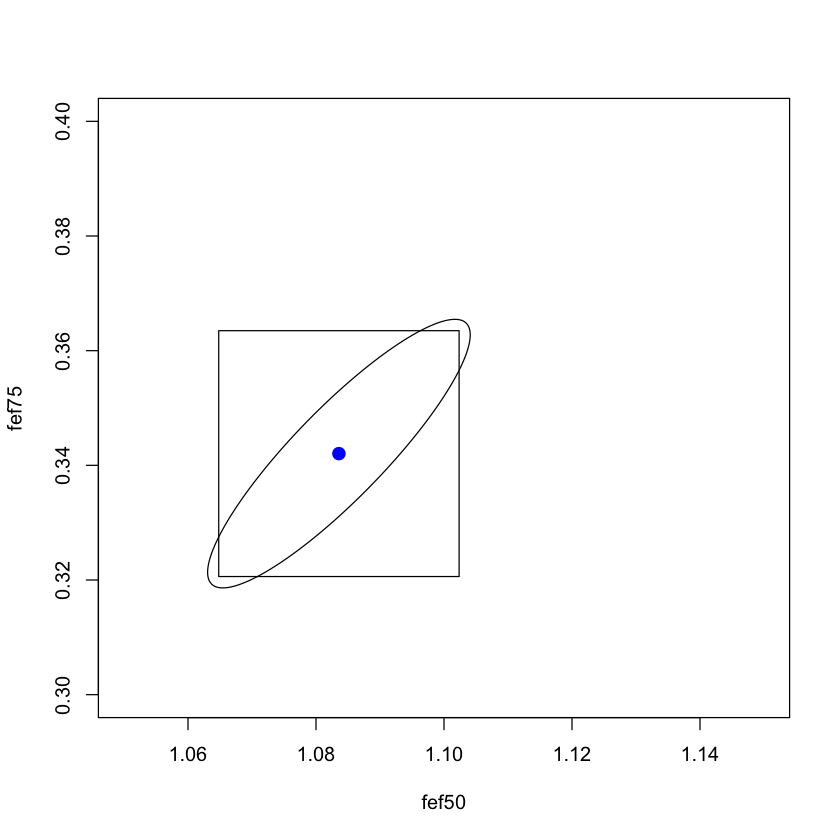

In [14]:
# for comparison, confidence rectangle
alpha <- 0.05/2 # we need to divide by d = 2 because of the Bonferroni correction
ran1 <- sd(log(resp$fef50))/sqrt(n) * qt(1 - alpha/2, df = n-1)
CI1 <- c(xbar[1] - ran1, xbar[1] + ran1)

ran2 <- sd(log(resp$fef75))/sqrt(n) * qt(1 - alpha/2, df = n-1)
CI2 <- c(xbar[2] - ran2, xbar[2] + ran2)

plot(xy[,1] + xbar[1], xy[,2] + xbar[2], type = "l", xlim = c(1.05, 1.15), ylim = c(0.3, 0.4), xlab = "fef50", ylab = "fef75")
points(xbar[1], xbar[2], col = "blue", cex = 1.5, pch = 16)
rect(xleft = CI1[1], xright = CI1[2], ybottom = CI2[1], ytop = CI2[2])